In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# As there are some null values in Age, Cabin  and Embarked columns

In [8]:
#We will now treat these null values

Text(0.5, 1.0, 'Survived Percentage')

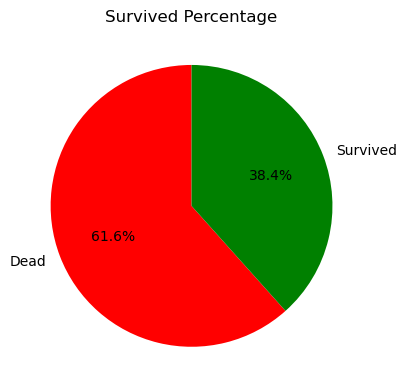

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(df['Survived'].value_counts(),labels=['Dead','Survived'],autopct='%1.1f%%',startangle=90,colors=['red','green'])
plt.title('Survived Percentage')

In [12]:
# There are 38.4% of people who survived and 61.6% of people who did not survived

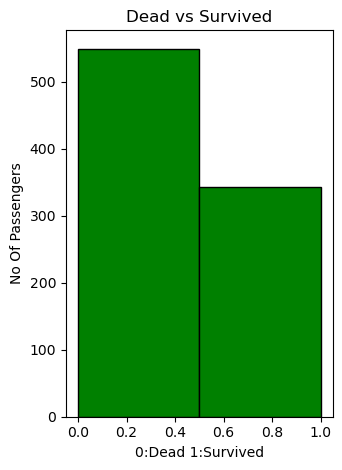

In [17]:
plt.subplot(1,2,2)
plt.hist(df['Survived'], bins = [0,0.5,1], color = ['green'] , edgecolor = 'black')
plt.xlabel('0:Dead 1:Survived')
plt.ylabel('No Of Passengers')
plt.title('Dead vs Survived')
plt.tight_layout()
plt.show()

In [22]:
# We can drop ticket column as it is unlikely to give any information

In [23]:
df = df.drop(['Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [24]:
# There are missing values in Embarked column . For that we will replace null values with the highest frequency

In [25]:
embarked_count = df.Embarked.value_counts()

In [26]:
embarked_count

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
# So it is clearly seen that there are 644 people who embarked from 'S' and 77 people who embarked from 'Q' and 168 people who embarked from 'C'
#And now we will replace null values with 'S'

In [30]:
df.Embarked.fillna('S', inplace = True)

In [31]:
df.Embarked.isnull().sum()

0

In [32]:
# So now we have no null values in the Embarked column

In [33]:
#Now Dropping the name column
df = df.drop(['Name'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [34]:
sex_map = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sex_map)

In [35]:
Embarked_map = {'S': 1, 'C': 2, 'Q': 3}

In [36]:
df['Embarked'] = df['Embarked'].map(Embarked_map)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,NaN,1
1,2,1,1,1,38.0,1,0,71.2833,C85,2
2,3,1,3,1,26.0,0,0,7.9250,NaN,1
3,4,1,1,1,35.0,1,0,53.1000,C123,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,1


In [38]:
# Now you can see that the Embarked column  and Sex column has been mapped

In [59]:
from sklearn.impute import SimpleImputer

In [60]:
imputer = SimpleImputer(strategy = 'median')
age_column = df['Age'].values.reshape(-1,1)
imputer.fit(age_column)
df['Age'] = imputer.transform(age_column)

In [62]:
df['Age'].isnull().sum()

0

In [63]:
# Now we have no null values in the Age column

In [42]:
# We have to drop one more column i.e. PassengerID

In [43]:
df = df.drop(['PassengerId','Cabin'],axis=1)

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [46]:
# So our Dataset is ready to be used for prediction and model building

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [71]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [72]:
X = df.drop(['Survived'],axis=1)

In [74]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [50]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.metrics import accuracy_score,classification_report

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [77]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.776536312849162
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       107
           1       0.74      0.69      0.71        72

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [81]:
# Now we have our model trained and have an accuracy of 78% 

In [79]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [80]:
# Now we have predicted the values